# ALL DATA COV MATRIX CALCULATION AND PCA

In [1]:
import scipy.sparse as sp
import pandas as pd
import numpy as np


data = pd.read_csv('select.freq.filtered', delimiter='\t', header=None)

locations = data[0]  # locations ar1_10.2
alleles = data[1]  # A, C, G, T

freq_data = sp.csr_matrix(data.iloc[:, 2:].values)  


In [2]:
mean_freq = freq_data.mean(axis=1).reshape(-1, 1)

In [3]:
print(len(mean_freq))

256


In [4]:
from scipy.sparse import save_npz

# save
save_npz('freq_data.npz', freq_data)



In [5]:
import numpy as np
from scipy.sparse import load_npz

freq_data = sp.csr_matrix(data.iloc[:, 2:].values)  

dense_data = freq_data.toarray()


num_locations = dense_data.shape[0] // 4

# combine by summing
combined_data = dense_data.reshape(num_locations, 4, -1).sum(axis=1)

print(f"Combined Data shape: {combined_data.shape}")


Combined Data shape: (64, 1150852)


In [6]:
print(len(combined_data))
print(combined_data)

64
[[  2  26   5 ...  14   8 237]
 [  2  18   0 ...  48   3 768]
 [  0   2   0 ...   2   1  53]
 ...
 [  8   0   0 ...   4   0  62]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


In [7]:
cd=pd.DataFrame(combined_data)

In [8]:
print(cd)

    0        1        2        3        4        5        6        7        \
0         2       26        5        7       33       13        1        0   
1         2       18        0        2       15        2        0        0   
2         0        2        0        0        1        1        2        0   
3         0        6        4        1        6        2        0        1   
4         0        6        1        5       14        5        0        1   
..      ...      ...      ...      ...      ...      ...      ...      ...   
59        7        3        3        3        7        1        4        1   
60        1        0        1        1        1        0        1        0   
61        8        0        0        2        2        0        0        2   
62        0        0        0        0        0        0        0        0   
63        0        0        0        0        0        0        0        0   

    8        9        ...  1150842  1150843  1150844  1150845  

In [9]:
cd_sparse = sp.csr_matrix(combined_data)  

In [10]:
# save
cov_matrix = (cd_sparse @ cd_sparse.T) / (cd_sparse.T.shape[0] - 1)
save_npz('cov_matrix.npz', cov_matrix)


In [11]:
print(cov_matrix)

  (0, 0)	7418.638378035037
  (0, 1)	281.54947078292497
  (0, 2)	83.1689523665531
  (0, 3)	138.7054640435643
  (0, 4)	272.5414523687254
  (0, 5)	269.7632299924143
  (0, 6)	29.711636866979305
  (0, 7)	48.7894618851615
  (0, 8)	31.315218911918222
  (0, 9)	181.3734870978085
  (0, 11)	32.06983093380464
  (0, 12)	190.79289412791056
  (0, 13)	120.45026072011059
  (0, 14)	130.78279812069502
  (0, 15)	66.91906771597714
  (0, 16)	440.7237409534336
  (0, 17)	166.5199621845052
  (0, 18)	209.7588541001398
  (0, 20)	67.90968335605565
  (0, 21)	582.5025985118838
  (0, 22)	484.0244784077174
  (0, 23)	161.62408165783407
  (0, 24)	169.388987801201
  (0, 25)	315.1535576716708
  (0, 26)	594.166102301688
  :	:
  (63, 36)	0.0026580330555389014
  (63, 37)	0.001998521094390151
  (63, 38)	0.004441930362835849
  (63, 39)	0.00037102978578460637
  (63, 40)	0.08741618159084016
  (63, 41)	0.0001312072544577882
  (63, 42)	0.004257718853265974
  (63, 43)	0.0006464781279244663
  (63, 44)	0.0012608061338956998
  (63, 4

In [12]:
import numpy as np 
from scipy.sparse.linalg import eigsh

eigenvalues, eigenvectors = eigsh(cov_matrix, which='LM')  # largest ev

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]


print("eigenvectors：", eigenvalues)
print("eigenvalues：\n", eigenvectors)

eigenvectors： [4328774.99137426 1766937.58514663 1161491.03296366  443426.31985016
  166153.10002446  153558.5124637 ]
eigenvalues：
 [[ 1.15792651e-03  5.72018763e-04  1.03647555e-03 -2.73339214e-03
   6.30318836e-03  9.00555662e-03]
 [ 3.05464766e-03  3.78330796e-03  1.03418301e-01  8.05813684e-04
   2.49953880e-03  2.71858412e-03]
 [ 5.42294127e-04  4.88785323e-04  4.01826411e-04 -1.22643099e-03
   1.59450496e-03  1.65400713e-03]
 [ 1.57800297e-03  2.20459825e-04  4.57725465e-04 -1.17060659e-03
   2.92024276e-03  2.72433496e-03]
 [ 8.98554324e-04  4.09564066e-04  6.04804087e-04 -2.24165456e-03
   4.44708696e-03  4.99884330e-03]
 [ 6.83971011e-04  3.88660385e-04  9.22956185e-04 -2.58987650e-03
   1.50385137e-02  2.25061681e-02]
 [ 1.39238024e-03  5.40605180e-04  3.81945604e-05 -2.04116667e-04
   1.36548731e-03  6.85449404e-04]
 [ 6.35197477e-04  4.20227567e-04  1.55452987e-04 -9.76623445e-03
   6.13504819e-04  6.84215091e-04]
 [ 5.97714370e-04  2.72526788e-04  1.86262311e-04 -6.500162

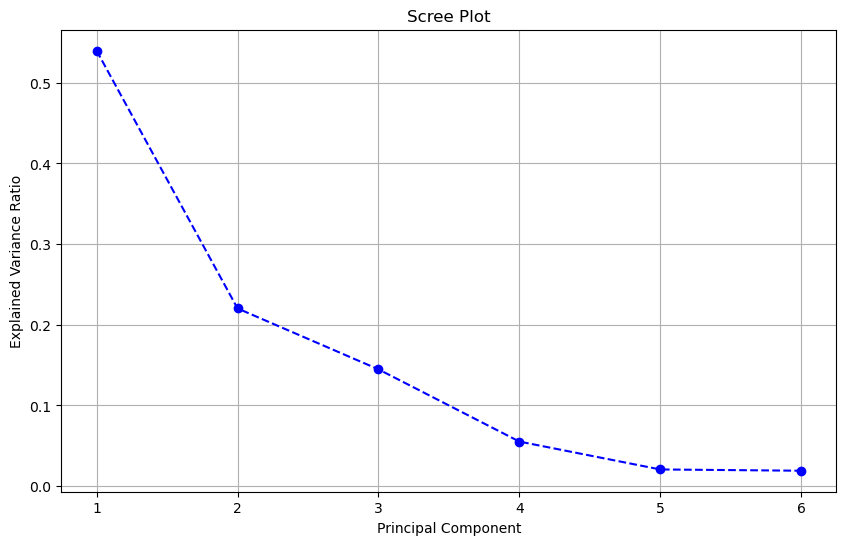

In [17]:
import matplotlib.pyplot as plt  
explained_variance_ratio = eigenvalues / eigenvalues.sum()

# Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), explained_variance_ratio, marker='o', linestyle='--', color='b')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

## choose first two PCs and rerun

In [18]:
import numpy as np
from scipy.sparse.linalg import eigsh

eigenvalues, eigenvectors = eigsh(cov_matrix, k = 2, which='LM')  

# 3. 排序特征值和特征向量（按特征值降序）
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]


print("eval：", eigenvalues)
print("evect：\n", eigenvectors)

eval： [4328774.99137425 1766937.58514663]
evect：
 [[ 1.15792651e-03  5.72018763e-04]
 [ 3.05464766e-03  3.78330796e-03]
 [ 5.42294127e-04  4.88785323e-04]
 [ 1.57800297e-03  2.20459825e-04]
 [ 8.98554324e-04  4.09564066e-04]
 [ 6.83971011e-04  3.88660385e-04]
 [ 1.39238024e-03  5.40605180e-04]
 [ 6.35197477e-04  4.20227567e-04]
 [ 5.97714370e-04  2.72526788e-04]
 [ 7.58114785e-04  3.39023400e-04]
 [ 1.74263686e-18 -1.94690935e-17]
 [ 1.68111753e-03  6.61332925e-04]
 [ 3.72829755e-03  1.59722250e-03]
 [ 7.97329591e-03  2.95664440e-03]
 [ 4.10961935e-04  9.67671904e-05]
 [ 1.31096680e-04  1.00623183e-04]
 [ 1.32059073e-02 -1.81888609e-02]
 [ 1.07162514e-02  3.99833920e-03]
 [ 3.48992077e-04  1.08826425e-04]
 [ 3.08684044e-18 -9.88627375e-18]
 [ 5.70493523e-03  1.65366483e-02]
 [ 7.78715913e-03  3.91968717e-03]
 [ 1.95504212e-03  2.27843989e-03]
 [ 1.47333219e-03  4.78702380e-04]
 [ 9.62236907e-04  1.12393259e-03]
 [ 1.70466448e-03  2.59686075e-04]
 [ 8.32717083e-02 -6.82890257e-02]
 [ 1.

In [19]:
projected_data = cd.T.dot(eigenvectors)

In [20]:
np.save('projected_data_combined.npy', projected_data)


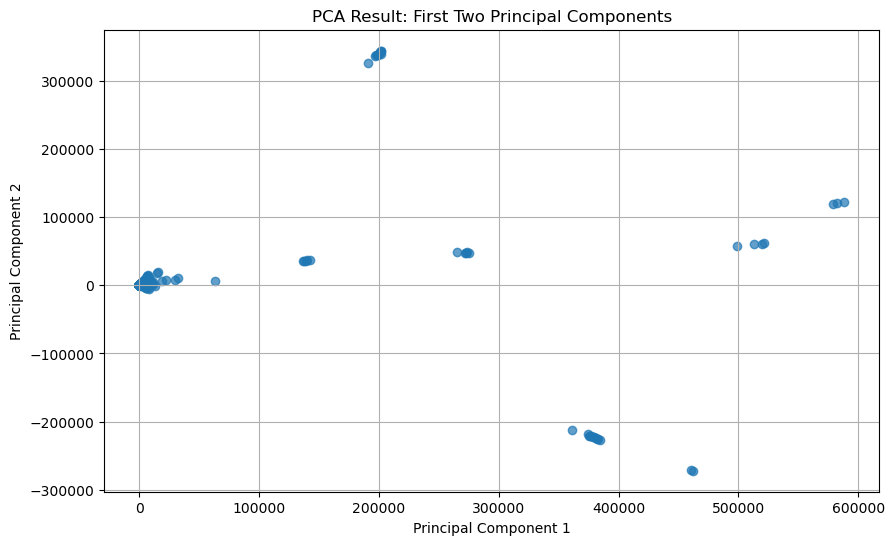

In [22]:
projected_data_np = projected_data.to_numpy()  
plt.figure(figsize=(10, 6))
plt.scatter(projected_data_np[:, 0], projected_data_np[:, 1], alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result: First Two Principal Components')
plt.grid(True)
plt.show()